# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [27]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [26]:
sinasc_cut = pd.cut(sinasc_raw['munResLat'],[sinasc_raw['munResLat'].min(), -10.5, sinasc_raw['munResLat'].max()])
sinasc_raw.pivot_table(
    values=['munResAlt', 'munResArea'],
    index=sinasc_cut,
    aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

sum                      mean                     min  \
                 munResAlt    munResArea   munResAlt    munResArea munResAlt   
munResLat                                                                      
(-13.5, -10.5]   3291565.0  8.349629e+07  254.903198   6466.064131     133.0   
(-10.5, -8.769]  1530415.0  3.137711e+08  109.050520  22357.926110      85.0   

                                 max               median             \
                munResArea munResAlt munResArea munResAlt munResArea   
munResLat                                                              
(-13.5, -10.5]     459.978     595.0  24855.724     191.0   5067.384   
(-10.5, -8.769]    965.676     192.0  34096.394      87.0  34096.394   

                        std                         var                
                  munResAlt    munResArea     munResAlt    munResArea  
munResLat                                                              
(-13.5, -10.5]   140.196000   5692.080934  19654.918293  3.239979e+07  
(-10.5, -8.769]   30.071422  14488.909375    904.290400  2.099285e+08

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [28]:
sinasc_cut = pd.cut(sinasc_raw['munResArea'],[sinasc_raw['munResArea'].min(), 3000, sinasc_raw['munResArea'].max()])
sinasc_raw.pivot_table(
    values=['CONSULTAS', 'APGAR5'],
    index=sinasc_cut,
    aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

sum                mean              min            \
                       APGAR5 CONSULTAS    APGAR5 CONSULTAS APGAR5 CONSULTAS   
munResArea                                                                     
(459.978, 3000.0]     46982.0     19272  9.131584  3.738506    0.0         1   
(3000.0, 34096.394]  199579.0     77142  9.190836  3.537326    0.0         1   

                       max           median                 std            \
                    APGAR5 CONSULTAS APGAR5 CONSULTAS    APGAR5 CONSULTAS   
munResArea                                                                  
(459.978, 3000.0]     10.0         9    9.0         4  0.801427  0.608679   
(3000.0, 34096.394]   10.0         9    9.0         4  0.787591  0.820967   

                          var            
                       APGAR5 CONSULTAS  
munResArea                               
(459.978, 3000.0]    0.642286  0.370490  
(3000.0, 34096.394]  0.620299  0.673986

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [33]:
sinasc_cut = pd.qcut(sinasc_raw['munResAlt'],4)
sinasc_raw.pivot_table(
    values=['QTDPARTNOR', 'QTDPARTCES'],
    index=sinasc_cut,
    aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

sum                  mean                   min  \
               QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResAlt                                                               
(84.999, 87.0]     3364.0     6024.0   0.448773   0.801917        0.0   
(87.0, 153.0]      2333.0     3283.0   0.519368   0.744107        0.0   
(153.0, 191.0]     3563.0     2915.0   0.517727   0.423877        0.0   
(191.0, 595.0]     3876.0     2349.0   0.608860   0.370096        0.0   

                                 max                median             \
               QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResAlt                                                               
(84.999, 87.0]        0.0       12.0       40.0        0.0        0.0   
(87.0, 153.0]         0.0        4.0       14.0        0.0        0.0   
(153.0, 191.0]        0.0       12.0        9.0        0.0        0.0   
(191.0, 595.0]        0.0        5.0       41.0        0.0        0.0   

                      std                   var             
               QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR  
munResAlt                                                   
(84.999, 87.0]   0.735847   1.380931   0.541471   1.906970  
(87.0, 153.0]    0.736689   1.330296   0.542711   1.769689  
(153.0, 191.0]   0.750559   0.917432   0.563339   0.841681  
(191.0, 595.0]   0.751648   1.116704   0.564974   1.247029

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [71]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",

    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",

    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",

    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",

    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",

    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

<module 'matplotlib.pyplot' from '/home/fabzd/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

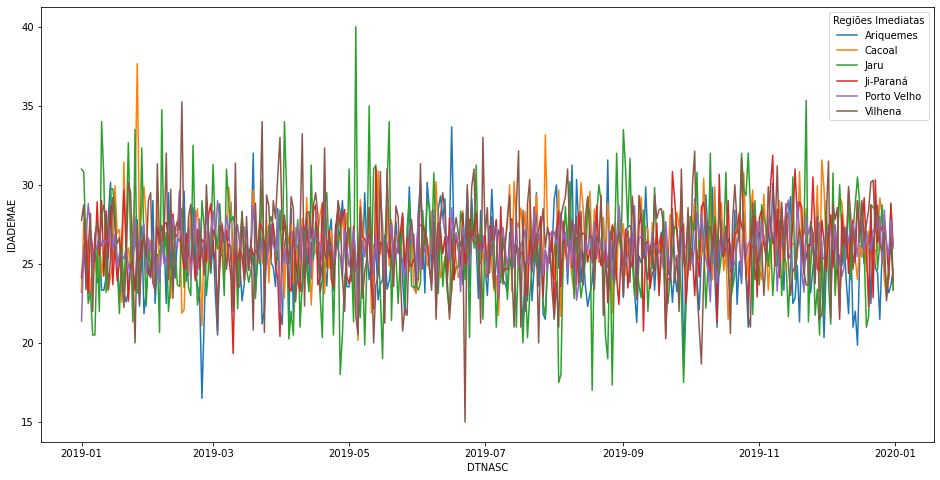

In [70]:
sinasc_df = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']].copy()
sinasc_df.loc[:,'DTNASC'] = pd.to_datetime(sinasc_df['DTNASC'])
sinasc_df = sinasc_df.set_index('munResNome')

sinasc_df_group = sinasc_df.groupby([imediatas, 'DTNASC']).mean().reset_index()


fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x = "DTNASC", y = "IDADEMAE", hue="munResNome",
             data = sinasc_df_group)
plt.legend(title='Regiões Imediatas', loc='best')
plt

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [73]:
IDH = {
    "Candeias do Jamari": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Nova Mamoré": "IDH-M baixo",
    "Porto Velho": "IDH-M alto",

    "Ariquemes": "IDH-M alto",
    "Alto Paraíso": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",

    "Jaru": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",

    "Alvorada D'Oeste": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M médio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",

    "Cacoal": "IDH-M alto",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Castanheiras": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",

    "Vilhena": "IDH-M alto",
    "Cabixi": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio"
}

In [77]:
sinasc_df = sinasc_raw[['munResNome', 'IDADEMAE', 'QTDPARTCES', 'QTDPARTNOR']].copy()
sinasc_df = sinasc_df.set_index('munResNome')
sinasc_df.groupby(IDH).mean().round(2)

,IDADEMAE,QTDPARTCES,QTDPARTNOR
munResNome,,,
IDH-M alto,26.28,0.50,0.58
IDH-M baixo,25.33,0.49,0.66
IDH-M médio,25.88,0.57,0.56


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [78]:
IFDM = {
    "Candeias do Jamari": "Desenv. Moderado",
    "Guajará-Mirim": "Desenv. Regular",
    "Itapuã do Oeste": "Desenv. Regular",
    "Nova Mamoré": "Desenv. Regular",
    "Porto Velho": "Desenv. Moderado",

    "Ariquemes": "Desenv. Moderado",
    "Alto Paraíso": "Desenv. Regular",
    "Buritis": "Desenv. Moderado",
    "Cacaulândia": "Desenv. Regular",
    "Campo Novo de Rondônia": "Desenv. Regular",
    "Cujubim": "Desenv. Regular",
    "Monte Negro": "Desenv. Moderado",
    "Rio Crespo": "Desenv. Moderado",

    "Jaru": "Desenv. Moderado",
    "Governador Jorge Teixeira": "Desenv. Regular",
    "Machadinho D'Oeste": "Desenv. Regular",
    "Theobroma": "Desenv. Regular",
    "Vale do Anari": "Desenv. Regular",

    "Alvorada D'Oeste": "Desenv. Regular",
    "Costa Marques": "Desenv. Regular",
    "Ji-Paraná": "Desenv. Moderado",
    "Mirante da Serra": "Desenv. Regular",
    "Nova União": "Desenv. Regular",
    "Ouro Preto do Oeste": "Desenv. Moderado",
    "Presidente Médici": "Desenv. Moderado",
    "São Francisco do Guaporé": "Desenv. Moderado",
    "São Miguel do Guaporé": "Desenv. Moderado",
    "Seringueiras": "Desenv. Regular",
    "Teixeirópolis": "Desenv. Moderado",
    "Urupá": "Desenv. Moderado",
    "Vale do Paraíso": "Desenv. Regular",

    "Cacoal": "Desenv. Moderado",
    "Alta Floresta D'Oeste": "Desenv. Moderado",
    "Alto Alegre dos Parecis": "Desenv. Regular",
    "Castanheiras": "Desenv. Regular",
    "Espigão D'Oeste": "Desenv. Regular",
    "Ministro Andreazza": "Desenv. Regular",
    "Nova Brasilândia D'Oeste": "Desenv. Regular",
    "Novo Horizonte do Oeste": "Desenv. Regular",
    "Parecis": "Desenv. Regular",
    "Pimenta Bueno": "Desenv. Moderado",
    "Primavera de Rondônia": "Desenv. Moderado",
    "Rolim de Moura": "Desenv. Moderado",
    "Santa Luzia D'Oeste": "Desenv. Moderado",
    "São Felipe D'Oeste": "Desenv. Moderado",

    "Vilhena": "Desenv. Moderado",
    "Cabixi": "Desenv. Regular",
    "Cerejeiras": "Desenv. Moderado",
    "Chupinguaia": "Desenv. Moderado",
    "Colorado do Oeste": "Desenv. Moderado",
    "Corumbiara": "Desenv. Regular",
    "Pimenteiras do Oeste": "Desenv. Moderado"
}

In [79]:
sinasc_df.groupby(IFDM).mean().round(2)

,IDADEMAE,QTDPARTCES,QTDPARTNOR
munResNome,,,
Desenv. Moderado,26.22,0.52,0.55
Desenv. Regular,25.54,0.53,0.69


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [80]:
PIB = {
    "Candeias do Jamari": "Acima 500 Milhões",
    "Guajará-Mirim": "Acima 500 Milhões",
    "Itapuã do Oeste": "Acima 100 Milhões",
    "Nova Mamoré": "Acima 500 Milhões",
    "Porto Velho": "Acima 1 Bilhão",

    "Ariquemes": "Acima 1 Bilhão",
    "Alto Paraíso": "Acima 300 Milhões",
    "Buritis": "Acima 500 Milhões",
    "Cacaulândia": "Acima 100 Milhões",
    "Campo Novo de Rondônia": "Acima 200 Milhões",
    "Cujubim": "Acima 300 Milhões",
    "Monte Negro": "Acima 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",

    "Jaru": "Acima 1 Bilhão",
    "Governador Jorge Teixeira": "Acima 100 Milhões",
    "Machadinho D'Oeste": "Acima 500 Milhões",
    "Theobroma": "Acima 100 Milhões",
    "Vale do Anari": "Acima 100 Milhões",

    "Alvorada D'Oeste": "Acima 200 Milhões",
    "Costa Marques": "Acima 100 Milhões",
    "Ji-Paraná": "Acima 1 Bilhão",
    "Mirante da Serra": "Acima 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima 500 Milhões",
    "Presidente Médici": "Acima 300 Milhões",
    "São Francisco do Guaporé": "Acima 300 Milhões",
    "São Miguel do Guaporé": "Acima 500 Milhões",
    "Seringueiras": "Acima 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima 100 Milhões",
    "Vale do Paraíso": "Acima 100 Milhões",

    "Cacoal": "Acima 1 Bilhão",
    "Alta Floresta D'Oeste": "Acima 300 Milhões",
    "Alto Alegre dos Parecis": "Acima 200 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima 500 Milhões",
    "Ministro Andreazza": "Acima 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima 300 Milhões",
    "Novo Horizonte do Oeste": "Acima 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",

    "Vilhena": "Acima 1 Bilhão",
    "Cabixi": "Acima 100 Milhões",
    "Cerejeiras": "Acima 500 Milhões",
    "Chupinguaia": "Acima 100 Milhões",
    "Colorado do Oeste": "Acima 300 Milhões",
    "Corumbiara": "Acima 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões"
}

In [81]:
sinasc_df.groupby(PIB).mean().round(2)

,IDADEMAE,QTDPARTCES,QTDPARTNOR
munResNome,,,
Acima 1 Bilhão,26.27,0.50,0.57
Acima 100 Milhões,25.66,0.53,0.48
Acima 200 Milhões,25.32,0.57,0.54
Acima 300 Milhões,25.83,0.55,0.47
Acima 500 Milhões,25.78,0.57,0.75
Até 100 Milhões,26.52,0.58,0.44


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Percebemos que os municipios com Desenvolvimento Regular e IDH Baixo tem, em média, mais partos Normais do que Cesareas. Em contrapartida o PIB parece não fazer diferença na média 